In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 데이터 불러오기 및 통합 === 
weather2017 = pd.read_csv('data/weather/weather2017.csv', encoding='cp949')
weather2018 = pd.read_csv('data/weather/weather2018.csv', encoding='cp949')
weather2019 = pd.read_csv('data/weather/weather2019.csv', encoding='cp949')
weather2020 = pd.read_csv('data/weather/weather2020.csv', encoding='cp949')
weather2021 = pd.read_csv('data/weather/weather2021.csv', encoding='cp949')
weather2022 = pd.read_csv('data/weather/weather2022.csv', encoding='cp949')

weather = pd.concat([weather2017, weather2018, weather2019, weather2020, weather2021, weather2022])
#print(weather.shape) ==> (52563, 38)
nsv = pd.read_csv('data/nsv/jeonnam.csv', encoding='cp949')
# print(nsv.shape) ==> (191003, 17)

# === 날씨 데이터 전처리 ===

# 1. NaN 개수 확인하기
# print(weather.isnull().sum()) # ==> 지울 것들 : 기온 QC플래그, 강수량 (mm), 강수량 QC플래그, 풍속 QC플래그, 풍향 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 일조 (hr), 일조 QC플래그, 일사(MJ/m2), 일사 QC플래그, 적설 (cm), 3시간신적설 (cm), 운형(운형약어), 최저운고 (100m ), 지면상태(지면상태코드), 현상번호(국내식), 지면온도 QC플래그
weather = weather.drop(['기온 QC플래그','강수량(mm)','전운량(10분위)','중하층운량(10분위)','강수량 QC플래그','풍속 QC플래그','풍향 QC플래그','습도 QC플래그','현지기압 QC플래그','해면기압 QC플래그','일조(hr)','일조 QC플래그','일사(MJ/m2)','일사 QC플래그','적설(cm)','3시간신적설(cm)','운형(운형약어)','최저운고(100m )','지면상태(지면상태코드)','현상번호(국내식)','지면온도 QC플래그'], axis=1)
#print(nsv.isnull().sum())
#print(weather.isnull().sum())

# 2. 결측값 채우기(NaN => 이전값 대치)
weather = weather.fillna(method='ffill')
#print(weather.isnull().sum())

# 3. 불필요한 변수 제거
weather = weather.drop(['지점','지점명'],axis=1)
nsv = nsv.drop(['id','device_id','data_type','CDMA_tel','InteTemp','ElecTemp','ip_addr','DoseRate_uR','DoseRate_low','DoseRate_high','InteTemp_high','ElecTemp_high','state','DoseRate_warn','DoseRate_alert'],axis=1)

# 4. 날짜 포맷 맞추기
weather['time'] = pd.to_datetime(weather['일시'])
nsv['time'] = pd.to_datetime(nsv['rcv_time'])
weather = weather.drop(['일시'], axis=1)
nsv = nsv.drop(['rcv_time'], axis=1)
# 5. 데이터 통합
df = pd.merge(weather, nsv, on='time', how='inner')

# 6. 기타
df = df.rename(columns={'DoseRate_nSv': 'nsv'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44334 entries, 0 to 44333
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   기온(°C)         44334 non-null  float64       
 1   풍속(m/s)        44334 non-null  float64       
 2   풍향(16방위)       44334 non-null  float64       
 3   습도(%)          44334 non-null  float64       
 4   증기압(hPa)       44334 non-null  float64       
 5   이슬점온도(°C)      44334 non-null  float64       
 6   현지기압(hPa)      44334 non-null  float64       
 7   해면기압(hPa)      44334 non-null  float64       
 8   시정(10m)        44334 non-null  float64       
 9   지면온도(°C)       44334 non-null  float64       
 10  5cm 지중온도(°C)   44334 non-null  float64       
 11  10cm 지중온도(°C)  44334 non-null  float64       
 12  20cm 지중온도(°C)  44334 non-null  float64       
 13  30cm 지중온도(°C)  44334 non-null  float64       
 14  time           44334 non-null  datetime64[ns]
 15  nsv            4433

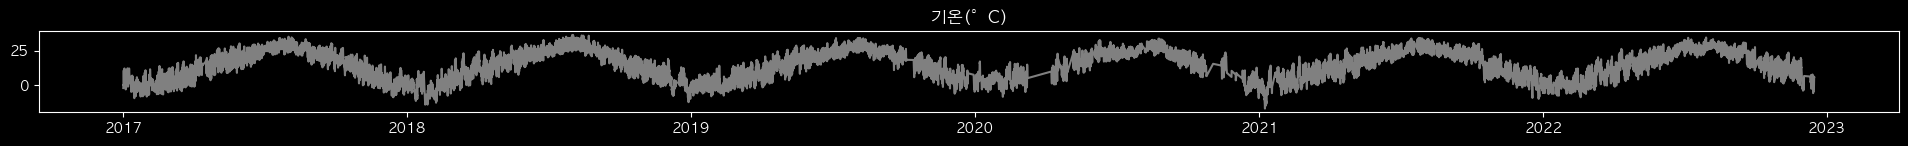

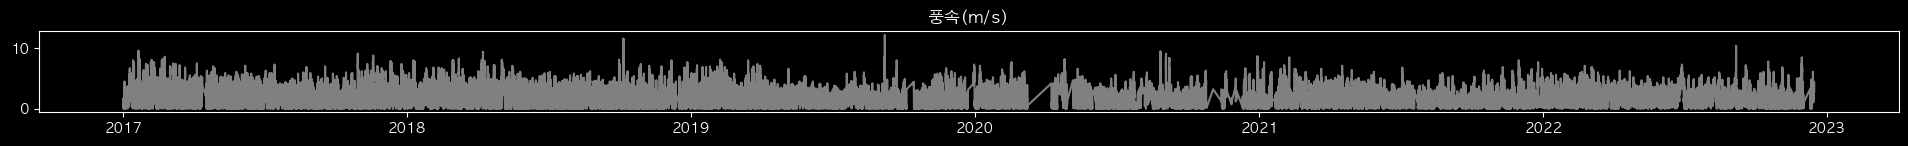

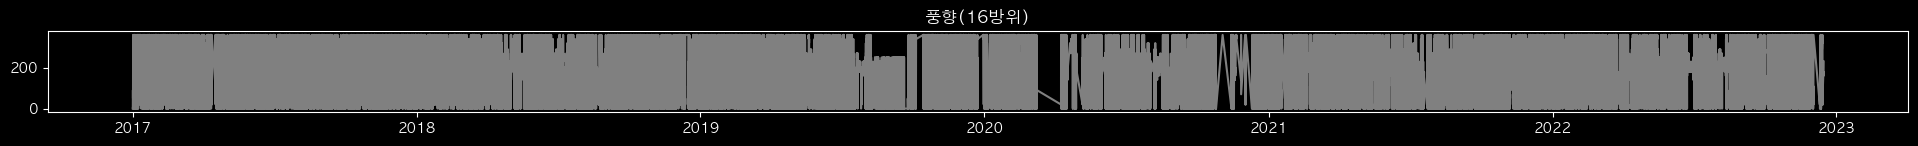

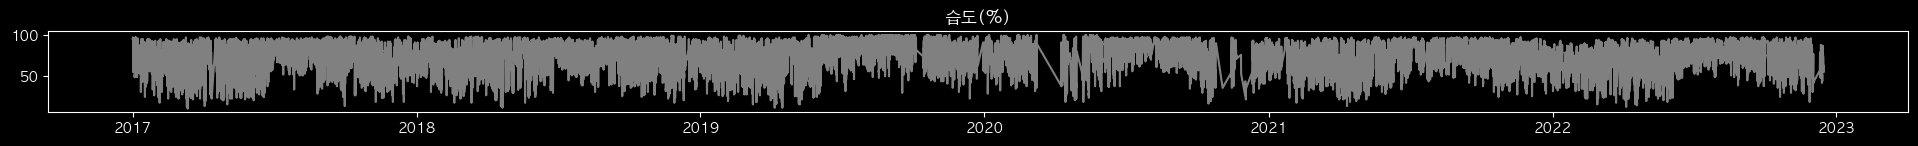

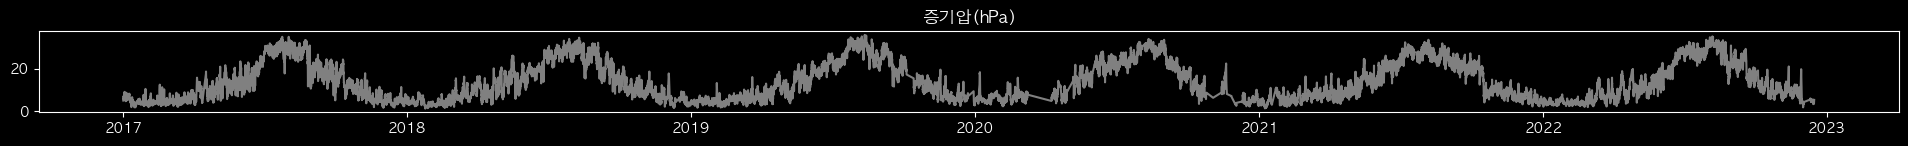

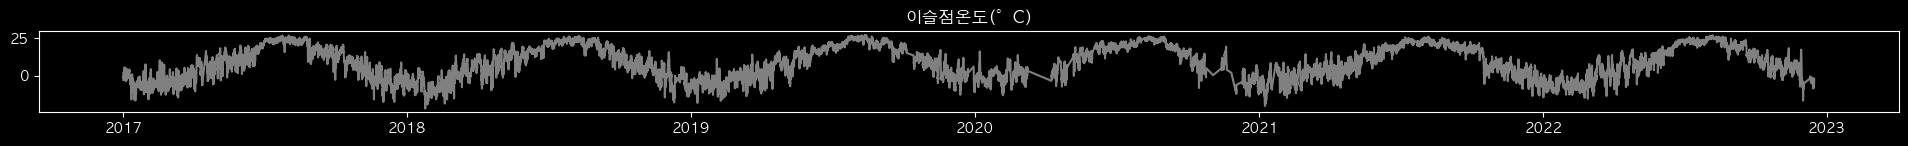

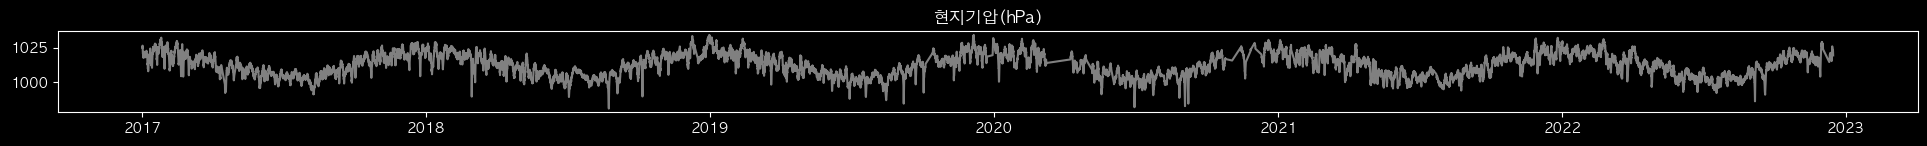

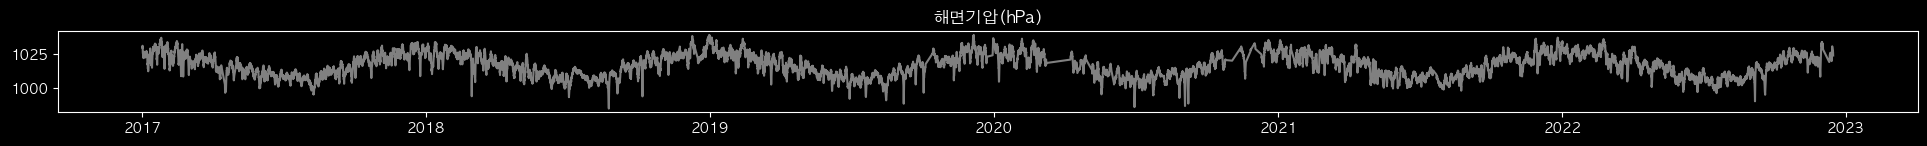

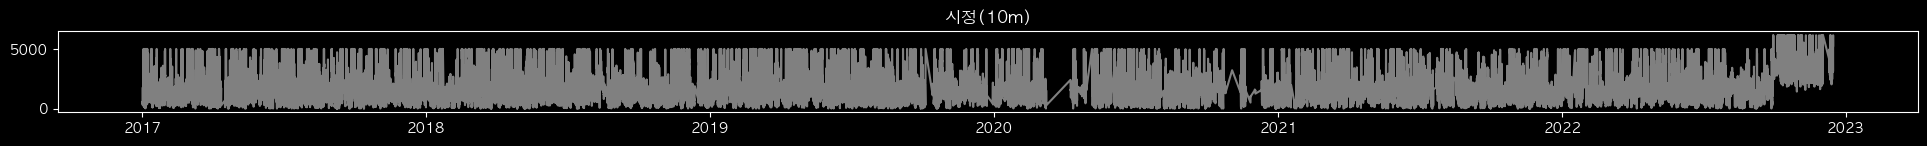

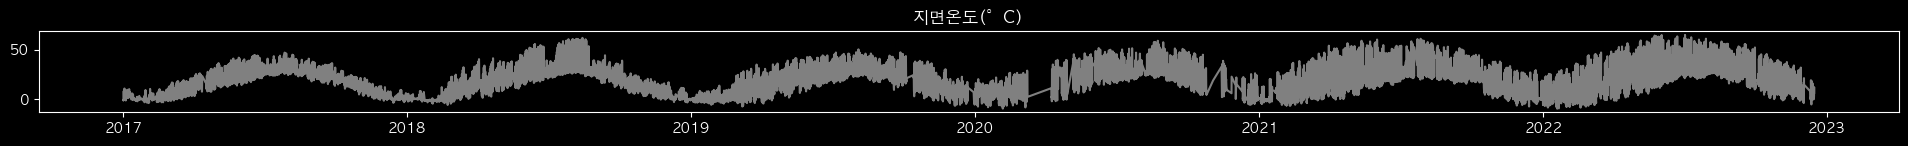

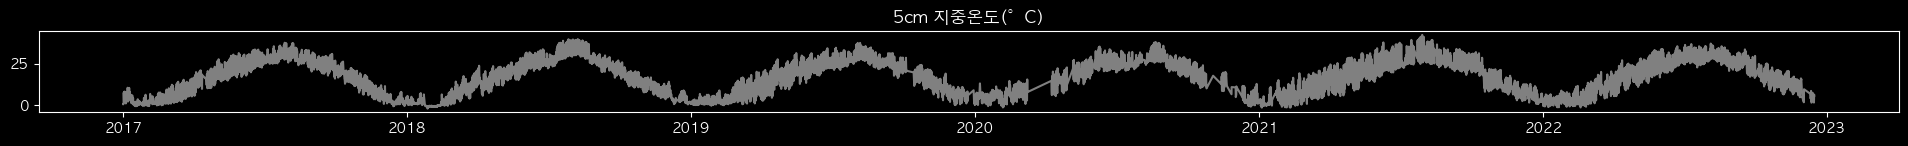

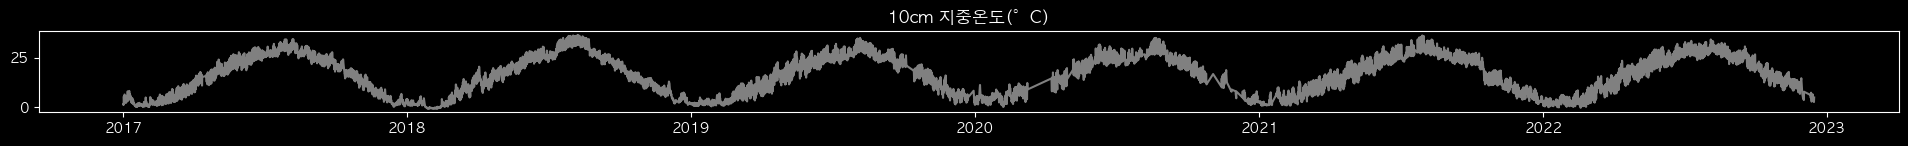

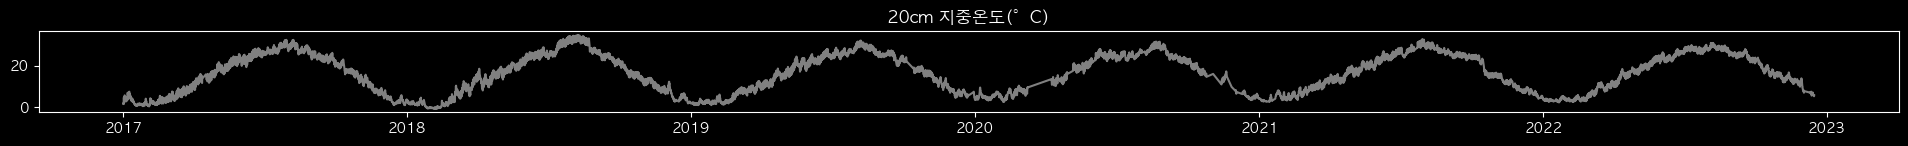

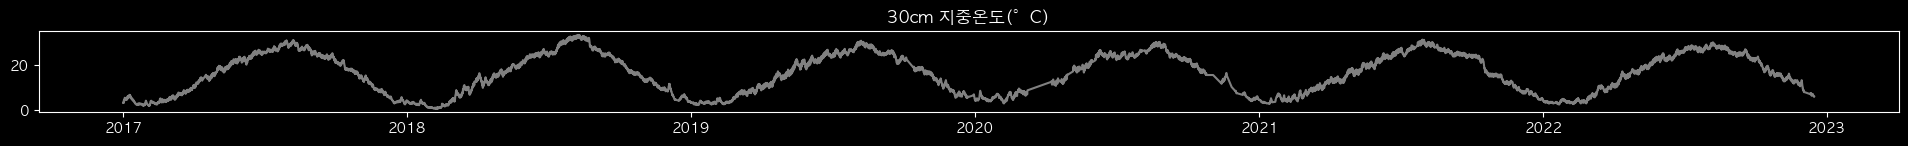

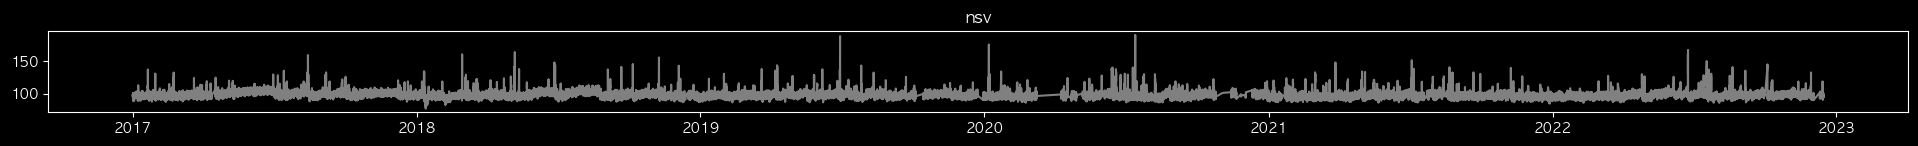

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline
plt.style.use(['dark_background'])

os = platform.system()

# Windows
if os == 'Windows':
    plt.rc('font', family= 'Malgun Gothic')

# Mac
elif os == 'Darwin':
    plt.rc('font', family= 'AppleGothic')

# Linux
elif os == 'Linux':
    plt.rc('font', family= 'NanumGothic')

else:
    print(f'{os} is not set')

# 열 이름 순서를 정의
order = ['time', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
         '현지기압(hPa)', '해면기압(hPa)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
         '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'nsv']

# 열 순서를 변경
df = df[order]

# for문 활용 모든 열 시계열 데이터 시각화
num_columns = len(df.columns)
for v, i in enumerate(df.columns[1:]):
    plt.figure(figsize=(24, 20))
    plt.subplot(num_columns, 1, v + 1)
    plt.plot(df['time'], df[i], linestyle='-', color='grey')
    plt.title(i)

plt.show()


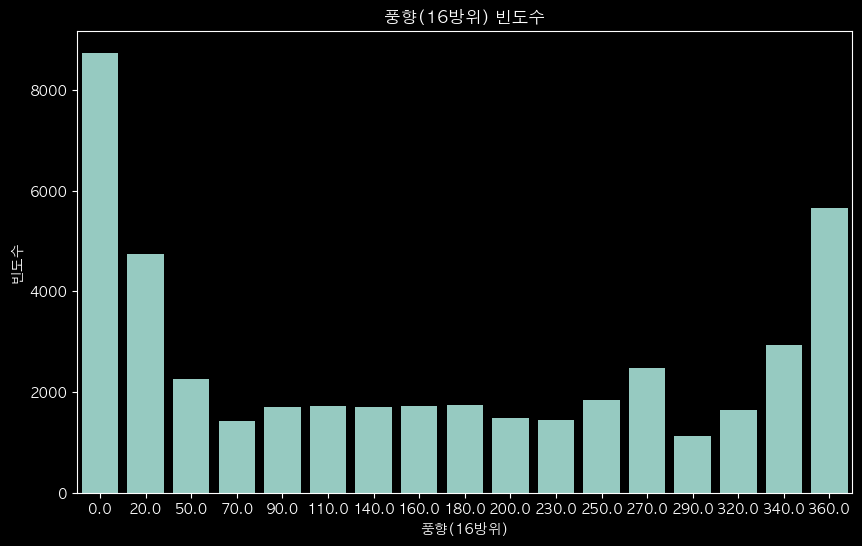

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 풍향(16방위) 열에서 각 값의 빈도수를 계산
wind_direction_counts = df['풍향(16방위)'].value_counts().reset_index()
wind_direction_counts.columns = ['풍향(16방위)', '빈도수']

# 빈도수를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='풍향(16방위)', y='빈도수', data=wind_direction_counts)
plt.xlabel('풍향(16방위)')
plt.ylabel('빈도수')
plt.title('풍향(16방위) 빈도수')

plt.show()


In [11]:
# 'time' 변수를 제외한 다른 변수들과 'nsv' 변수 간의 상관관계 계산
correlation_matrix = df.drop('time', axis=1).corrwith(df['nsv'])

# 결과를 출력
print(correlation_matrix)


기온(°C)           0.167597
풍속(m/s)          0.028112
풍향(16방위)        -0.025663
습도(%)            0.097614
증기압(hPa)         0.151323
이슬점온도(°C)        0.185765
현지기압(hPa)       -0.248648
해면기압(hPa)       -0.248053
시정(10m)         -0.101533
지면온도(°C)         0.120996
5cm 지중온도(°C)     0.168116
10cm 지중온도(°C)    0.176343
20cm 지중온도(°C)    0.178831
30cm 지중온도(°C)    0.183022
nsv              1.000000
dtype: float64


/Users/foxyhyun/opt/anaconda3/envs/rmtec/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/foxyhyun/opt/anaconda3/envs/rmtec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


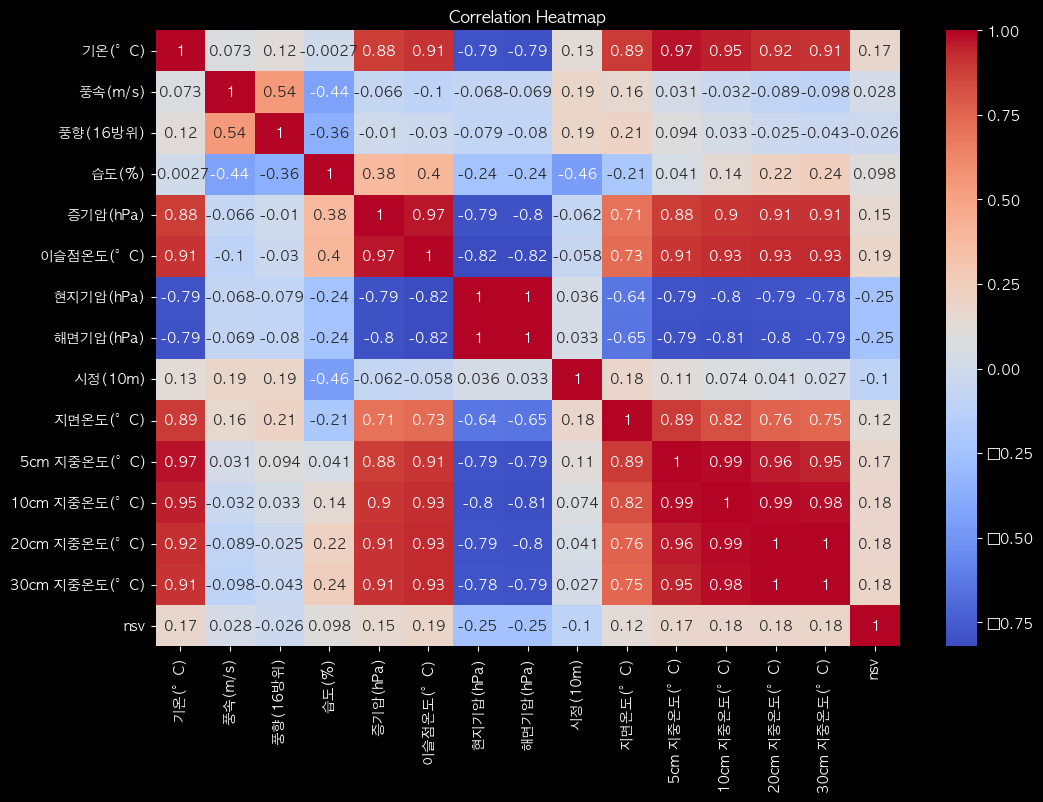

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 히트맵
correlation_matrix = df.drop('time', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
